In [1]:
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
from ogb.lsc import PCQM4Mv2Dataset,PygPCQM4Mv2Dataset
import ogb
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from torch_geometric.utils.smiles import to_smiles, from_smiles

In [2]:
print(rdkit.__version__) #2021.03.5
print(ogb.__version__) #1.3.3

2022.09.5
1.3.5


In [3]:
suppl = Chem.SDMolSupplier('../../data/pcqm4m-v2-train.sdf')
dataset = PCQM4Mv2Dataset(root = '../../data', only_smiles = True)
data_pyg = PygPCQM4Mv2Dataset(root='../../data')

In [4]:
type(suppl[0])

rdkit.Chem.rdchem.Mol

In [5]:
print(dataset[0])
mol = suppl[0]
mol=Chem.RemoveHs(mol) # removes hydrogen from molecule
Chem.Kekulize(mol, clearAromaticFlags=True)
smile = Chem.MolToSmiles(mol,isomericSmiles=False, kekuleSmiles=True, canonical=True)
print(smile) # same?

('O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C', 3.0476751256)
CC1=CC=C(C2[CH]C3=CN=CC=C3[N]C2=O)C=C1


In [6]:
print(to_smiles(from_smiles(smile,False,True)))

#to_smiles(data_pyg[0])
print(from_smiles(smile,False,True))
print(data_pyg[0].edge_index)

Cc1ccc(C2[CH]c3cnccc3[N]C2=O)cc1
Data(x=[18, 9], edge_index=[2, 40], edge_attr=[40, 3], smiles='CC1=CC=C(C2[CH]C3=CN=CC=C3[N]C2=O)C=C1')
tensor([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 14, 17, 10,  1,
         16, 11,  8,  3],
        [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15, 17, 14,  1, 10,
         11, 16,  3,  8]])


In [8]:
for bondi, bond in enumerate(mol.GetBonds()):
    print(bond.GetIdx())
    print([bondi, bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])
# 9 = 1
# 2 = 0

0
[0, 2, 9]
1
[1, 3, 1]
2
[2, 4, 10]
3
[3, 4, 2]
4
[4, 5, 13]
5
[5, 6, 5]
6
[6, 7, 12]
7
[7, 8, 11]
8
[8, 9, 1]
9
[9, 9, 0]
10
[10, 10, 3]
11
[11, 11, 13]
12
[12, 11, 7]
13
[13, 12, 14]
14
[14, 12, 10]
15
[15, 13, 16]
16
[16, 14, 17]
17
[17, 15, 6]
18
[18, 15, 8]
19
[19, 16, 14]


In [7]:
# Value of the chemical property for each molecule of the dataset
prop_values=[]
for dat in dataset:
    prop_values.append(dat[1])
prop_values_arr=np.array(prop_values)
prop_values_arrt

array([3.04767513, 4.41096552, 4.63954115, ...,        nan,        nan,
              nan])

(array([1.020763e+06, 2.425543e+06, 5.839000e+03, 3.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([ 0.37551711,  5.04036485,  9.70521259, 14.37006033, 19.03490807,
        23.69975581, 28.36460355, 33.02945129, 37.69429903, 42.35914677,
        47.0239945 ]),
 <BarContainer object of 10 artists>)

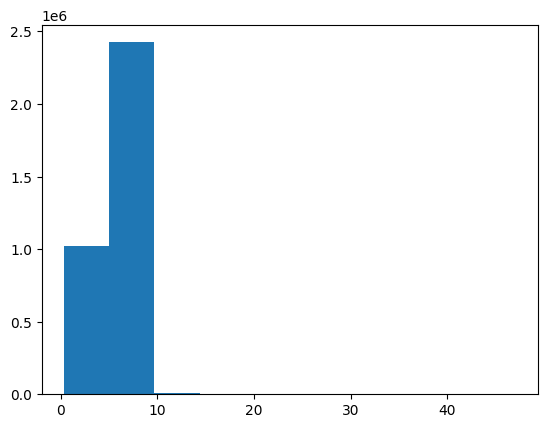

In [10]:
plt.hist(prop_values_arr)

In [7]:
# We get all the smiles from the dataset, and those who do not get "smiled" are in the "fail" list
atomlist=[]
smilesall=[] # Simplified Molecular Input Line Entry Specification 
moliall=[]
fail=[]
isomericSmiles=False # chirality not considered
kekuleSmiles=True
for moli, mol in enumerate(tqdm(suppl)):   
    mol=suppl[moli]
    mol=Chem.RemoveHs(mol) # removes hydrogen from molecule
    Chem.Kekulize(mol, clearAromaticFlags=True)
    try: # trying to transform molecule to SMILE (easier for computer usage format)
        smile = Chem.MolToSmiles(mol,isomericSmiles=isomericSmiles, kekuleSmiles=kekuleSmiles, canonical=True)
        smilesall.append(smile)
        moliall.append(moli)
    except:
        fail.append(moli)
    for atom in mol.GetAtoms():
        atomidx=atom.GetAtomicNum() # nombre de protons dans l'atome
        if atomidx not in atomlist:
            atomlist.append(atomidx)
smilesall2=np.array(smilesall)
print(smilesall2)

  4%|█▎                             | 148425/3378606 [04:02<1:23:07, 647.60it/s][15:30:27] Warning: molecule is tagged as 3D, but all Z coords are zero
[15:30:27] Warning: molecule is tagged as 3D, but all Z coords are zero
 49%|███████████████▋                | 1652183/3378606 [45:44<44:37, 644.80it/s][16:12:09] WARNING: not removing hydrogen atom without neighbors
[16:12:09] WARNING: not removing hydrogen atom without neighbors
[16:12:09] WARNING: not removing hydrogen atom without neighbors
[16:12:09] WARNING: not removing hydrogen atom without neighbors
[16:12:09] WARNING: not removing hydrogen atom without neighbors
[16:12:09] WARNING: not removing hydrogen atom without neighbors
[16:12:09] WARNING: not removing hydrogen atom without neighbors
[16:12:09] WARNING: not removing hydrogen atom without neighbors
[16:12:09] WARNING: not removing hydrogen atom without neighbors
 50%|████████████████▏               | 1704898/3378606 [47:07<44:22, 628.67it/s][16:13:32] WARNING: not removin

 75%|██████████████████████▋       | 2550533/3378606 [1:09:32<22:02, 626.12it/s][16:35:57] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:35:57] Warning: molecule is tagged as 3D, but all Z coords are zero
 76%|██████████████████████▋       | 2555713/3378606 [1:09:40<22:07, 619.90it/s][16:36:05] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[16:36:05] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[16:36:05] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
 77%|███████████████████████       | 2597509/3378606 [1:10:46<20:19, 640.31it/s][16:37:11] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:37:11] Warning: molecule is tagged as 3D, but all Z coords are zero
 82%|████████████████████████▋     | 2778645/3378606 [1:15:25<15:59, 625.21it/s][16:41:51] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:41:51] War

In [8]:
# Refactoring in dictionnary
smilesdict={}
for sidx, s in enumerate(smilesall):
    smilesdict[s]=sidx

In [9]:
# equivalent to decision tree in the paper
results_all=[]
verbose=False
generatedsmilelist=[]
singlebond = list(Chem.MolFromSmiles("CC").GetBonds())[0]
for molidx in range(len(suppl)):
    if molidx%10000==0:
        print(molidx, end=', ')
    mol=suppl[molidx]
    Chem.Kekulize(mol, clearAromaticFlags=True)
    if mol:
        results_arr=[]
        canrm=[]
        hetero=[]
        for atomi, atom in enumerate(mol.GetAtoms()):
            numnb=len(atom.GetNeighbors())
            if numnb==1 and atom.GetAtomicNum()==6:
                canrm.append(atomi)
            if atom.GetAtomicNum()!=6:
                hetero.append(atomi)
          #print(atomi, numnb)
        nonsingle=[]
        inring=[]
        for bondi, bond in enumerate(mol.GetBonds()):
            bondtyp=bond.GetBondType()
            if bondtyp!=Chem.BondType.SINGLE:
                nonsingle.append(bondi)
            if bond.IsInRing() and bondtyp==Chem.BondType.SINGLE:
                inring.append([bondi, bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])
        # remove atom if carbon end atom
        for rmidx in canrm:
            molcopy= Chem.RWMol(mol)
            molcopy.RemoveAtom(rmidx)
            generatedsmile=Chem.MolToSmiles(molcopy,isomericSmiles=isomericSmiles, kekuleSmiles=kekuleSmiles)
            if generatedsmile in smilesdict:
                match=smilesdict[generatedsmile]
                if verbose:
                    print(molidx,'r', rmidx, ':', match)
                results_arr.append([molidx, 'r', rmidx, match])
        # change atom to C if heteroatom
        for cidx in hetero:
            molcopy= Chem.RWMol(mol)
            (molcopy.GetAtoms()[cidx]).SetAtomicNum(6)
            try:
                generatedsmile=Chem.MolToSmiles(molcopy,isomericSmiles=isomericSmiles, kekuleSmiles=kekuleSmiles)
                if generatedsmile in smilesdict:
                    match=smilesdict[generatedsmile]
                    if verbose:
                        print(molidx,'c', cidx, ':', match)
                    results_arr.append([molidx,'c', cidx, match])
            except:
                match=0
        # saturate bond
        for bidx in nonsingle:
            molcopy= Chem.RWMol(mol)
            molcopy.ReplaceBond(bidx, singlebond, preserveProps=False)
            try:
                generatedsmile=Chem.MolToSmiles(molcopy,isomericSmiles=isomericSmiles, kekuleSmiles=kekuleSmiles)
                if generatedsmile in smilesdict:
                    match=smilesdict[generatedsmile]
                    if verbose:
                        print(molidx,'b', bidx, ':', match)
                    results_arr.append([molidx,'b', bidx, match])
            except:
                match=0
        # break ring bond if saturated
        for didx in inring:
            molcopy= Chem.RWMol(mol)
            molcopy.RemoveBond(didx[1],didx[2])
            try:
                generatedsmile=Chem.MolToSmiles(molcopy,isomericSmiles=isomericSmiles, kekuleSmiles=kekuleSmiles)
                if generatedsmile in smilesdict:
                    match=smilesdict[generatedsmile]
                    if verbose:
                        print(molidx,'d', didx[0], ':', match)
                    results_arr.append([molidx,'d', didx[0], match])
            except:
                match=0
        if results_arr!=[]:
            results_all.append(np.array(results_arr))
            
            
results_all2=np.vstack(results_all)

0, 

KeyboardInterrupt: 

In [ ]:
# split atomwise, bondwise
idx_first=results_all2[:,0].astype('int')
operatoridx=results_all2[:,1]
operatoridx[operatoridx=='c']=0
operatoridx[operatoridx=='r']=1
operatoridx[operatoridx=='b']=2
operatoridx[operatoridx=='d']=3
operatoridx=operatoridx.astype('int')
atombondidx=results_all2[:,2].astype('int')
idx_second=results_all2[:,3].astype('int')
atomwise_idx=np.argwhere(operatoridx<2)[:,0]
bondwise_idx=np.argwhere(operatoridx>=2)[:,0]

In [ ]:
# get explanation values for pairs
explain_val=prop_values_arr[idx_first]-prop_values_arr[idx_second]
results_modif=np.vstack((idx_first, operatoridx,atombondidx,idx_second,explain_val)).T

In [ ]:
# Atomwise
df = pd.DataFrame(results_modif[atomwise_idx,:])
list_columns=['molecule index', 'operation index', 'atom index', 'paired molecule index', 'explanation value']

df.columns =list_columns
for key in list_columns[:-1]:
    print(key)
    tmp=df[key].values.astype(int)
    df[key] = tmp

key=list_columns[-1]
tmp=df[key].values
df[key] = np.round(tmp, 10)

In [ ]:
# Bondwise
df2 = pd.DataFrame(results_modif[bondwise_idx,:])
list_columns=['molecule index', 'operation index', 'bond index', 'paired molecule index', 'explanation value']

df2.columns =list_columns
for key in list_columns[:-1]:
    print(key)
    tmp=df2[key].values.astype(int)
    df2[key] = tmp

key=list_columns[-1]
tmp=df2[key].values
df2[key] = np.round(tmp, 10)